In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Set

df = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Iris%20(2).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Class Labels

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Check for Missing Data

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Basic Statistical information

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Let as add our validation_data from a specific source

validation_data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/CPE%20Electives%20(1%20-%203)/04.%20Live%20Lectures%20Notebook/54.%20Support%20Vector%20Machines/validation_data.csv')
validation_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,150,5.2,3.5,1.5,0.20,-1
1,151,5.2,3.4,1.4,0.20,-1
2,152,4.7,3.2,1.6,0.21,-1
3,153,4.8,3.1,1.6,0.20,-1
4,154,5.2,2.7,3.9,1.30,-1
5,155,5.0,2.0,3.5,1.10,-1
6,156,5.9,3.0,4.2,1.50,-1
7,157,6.0,2.2,4.0,1.20,-1
8,158,6.8,3.2,5.9,2.20,-1
9,159,6.7,3.3,5.7,2.40,-1


In [7]:
# Insert New Data to Original DataFrame

df = pd.concat([df, validation_data], axis = 0)
df.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2], inplace = True) # Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
7,157,6.0,2.2,4.0,1.2,-1
8,158,6.8,3.2,5.9,2.2,-1
9,159,6.7,3.3,5.7,2.4,-1
10,160,6.7,3.0,5.2,2.4,-1


In [9]:
# Set Specific Index

df = df.set_index('Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
157,6.0,2.2,4.0,1.2,-1
158,6.8,3.2,5.9,2.2,-1
159,6.7,3.3,5.7,2.4,-1


In [10]:
# Check if the validation data is properly inserted

df.tail(12)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
150,5.2,3.5,1.5,0.20,-1
151,5.2,3.4,1.4,0.20,-1
152,4.7,3.2,1.6,0.21,-1
153,4.8,3.1,1.6,0.20,-1
154,5.2,2.7,3.9,1.30,-1
155,5.0,2.0,3.5,1.10,-1
156,5.9,3.0,4.2,1.50,-1
157,6.0,2.2,4.0,1.20,-1
158,6.8,3.2,5.9,2.20,-1


In [11]:
# Data Scaling

X = df.drop('Species', axis = 1)

scaler = StandardScaler()
scaler.fit(X) # This line fit the scaler to the data

StandardScaler()

In [12]:
# Scale the data

scaled_features_data = scaler.transform(X)
scaled_features_data

array([[-8.93525096e-01,  1.04647695e+00, -1.34212496e+00,
        -1.30568216e+00],
       [-1.13721376e+00, -1.02095312e-01, -1.34212496e+00,
        -1.30568216e+00],
       [-1.38090242e+00,  3.57333593e-01, -1.39926668e+00,
        -1.30568216e+00],
       [-1.50274675e+00,  1.27619140e-01, -1.28498324e+00,
        -1.30568216e+00],
       [-1.01536943e+00,  1.27619140e+00, -1.34212496e+00,
        -1.30568216e+00],
       [-5.27992102e-01,  1.96533476e+00, -1.17069980e+00,
        -1.04504448e+00],
       [-1.50274675e+00,  8.16762497e-01, -1.34212496e+00,
        -1.17536332e+00],
       [-1.01536943e+00,  8.16762497e-01, -1.28498324e+00,
        -1.30568216e+00],
       [-1.74643541e+00, -3.31809765e-01, -1.34212496e+00,
        -1.30568216e+00],
       [-1.13721376e+00,  1.27619140e-01, -1.28498324e+00,
        -1.43600100e+00],
       [-5.27992102e-01,  1.50590585e+00, -1.28498324e+00,
        -1.30568216e+00],
       [-1.25905809e+00,  8.16762497e-01, -1.22784152e+00,
      

In [13]:
# Convert scaled_features_data (numpy array to DataFrame)

scaled_features_data = pd.DataFrame(scaled_features_data, columns = df.columns[:-1]) # all columns except 'Species'
scaled_features_data.tail()

#df.columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
157,0.203074,-1.939811,0.143560,-0.002494
158,1.177829,0.357334,1.229252,1.300695
159,1.055984,0.587048,1.114969,1.561332
160,1.055984,-0.102095,0.829260,1.561332
161,0.568607,-1.250668,0.714977,1.040057


In [14]:
# Set X (features) and y (Class Target)

X = scaled_features_data.iloc[:150,:] # Check the original data
y = df.iloc[:150, -1] # y will be 0 to 149 index of Species

In [15]:
# Show X

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.893525,1.046477,-1.342125,-1.305682
1,-1.137214,-0.102095,-1.342125,-1.305682
2,-1.380902,0.357334,-1.399267,-1.305682
3,-1.502747,0.127619,-1.284983,-1.305682
4,-1.015369,1.276191,-1.342125,-1.305682
...,...,...,...,...
145,1.055984,-0.102095,0.829260,1.431013
146,0.568607,-1.250668,0.714977,0.909738
147,0.812296,-0.102095,0.829260,1.040057
148,0.446763,0.816762,0.943544,1.431013


In [16]:
# Show y

y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [17]:
# Train - Test Split Proper

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [18]:
# Show X_train

X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,-1.868280,-0.102095,-1.513550,-1.436001
102,1.543362,-0.102095,1.229252,1.170376
67,-0.040615,-0.791239,0.200701,-0.263131
34,-1.137214,0.127619,-1.284983,-1.436001
98,-0.893525,-1.250668,-0.427857,-0.132813
...,...,...,...,...
63,0.324918,-0.331810,0.543552,0.258144
70,0.081230,0.357334,0.600694,0.779419
81,-0.406148,-1.480382,-0.027865,-0.263131
11,-1.259058,0.816762,-1.227842,-1.305682


In [19]:
# Show y_train

y_train

Id
14     0
103    2
68     1
35     0
99     1
      ..
64     1
71     1
82     1
12     0
96     1
Name: Species, Length: 105, dtype: int64

In [20]:
# Support Vector Machine Classifier

model = SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [21]:
# Prediction on X_test

predictions = model.predict(X_test)
predictions

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1])

<Axes: >

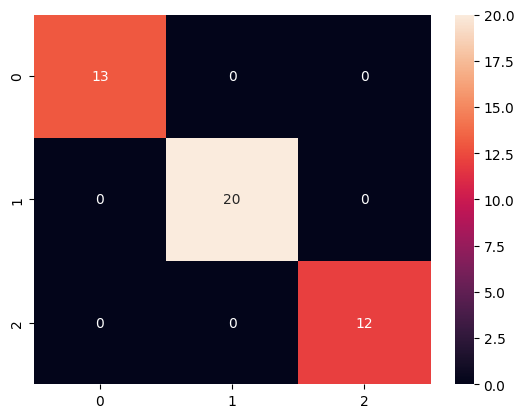

In [22]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')

In [23]:
# Accuracy Score

print(accuracy_score(y_test, predictions))

1.0


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [25]:
# Grid Search

from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C': [0.01, 0.05, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [26]:
# Identify the Best Hyperparameters

grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [27]:
# Sample Prediction on Unseen Data

validation_feature = scaled_features_data.iloc[150:,:]
y_predict = model.predict(validation_feature)

pd.concat([validation_feature, pd.DataFrame(y_predict, index = list(range(150,162)), columns = ['Species'])], axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,-0.771681,1.046477,-1.284983,-1.305682,0
151,-0.771681,0.816762,-1.342125,-1.305682,0
152,-1.380902,0.357334,-1.227842,-1.292650,0
153,-1.259058,0.127619,-1.227842,-1.305682,0
154,-0.771681,-0.791239,0.086418,0.127825,1
155,-1.015369,-2.399240,-0.142149,-0.132813,1
156,0.081230,-0.102095,0.257843,0.388463,1
157,0.203074,-1.939811,0.143560,-0.002494,1
158,1.177829,0.357334,1.229252,1.300695,2
159,1.055984,0.587048,1.114969,1.561332,2
